In [21]:
import numpy as np
import pandas as pd

data_train = pd.read_csv('Dataset/data_train.csv')

In [22]:
data_train

,Unnamed: 0,tarif_type_mean,counter_number_mean,counter_statue_mean,counter_code_mean,reading_remarque_mean,counter_coefficient_mean,old_index_mean,new_index_mean,months_number_mean,...,old_index_range,new_index_range,months_number_range,counter_type_range,consumo_total_range,diff_index_range,disrict,client_catg,region,target
0,0,11.000000,1.335667e+06,0.000000,203.685714,6.971429,1.0,9444.542857,9807.514286,4.628571,...,12808.0,13269.0,10.0,0.0,1348.0,1348.0,60,11,101,0.0
1,1,11.000000,6.789020e+05,0.000000,203.000000,7.216216,1.0,14330.756757,14888.297297,4.324324,...,19830.0,20361.0,6.0,0.0,1017.0,1017.0,69,11,107,0.0
2,2,11.000000,5.727650e+05,0.000000,203.222222,7.055556,1.0,32873.000000,33709.500000,6.444444,...,16017.0,18640.0,8.0,0.0,2894.0,2894.0,62,11,301,0.0
3,3,11.000000,2.078000e+03,0.000000,413.000000,6.150000,1.0,94.150000,95.350000,4.200000,...,9.0,24.0,2.0,0.0,15.0,15.0,69,11,105,0.0
4,4,11.000000,1.957500e+04,0.000000,207.000000,8.857143,1.0,6900.428571,7823.071429,3.714286,...,13337.0,12770.0,2.0,0.0,2258.0,2258.0,62,11,303,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,135488,24.887324,5.423355e+05,0.070423,110.267606,6.000000,1.0,7.295775,7.295775,4.225352,...,14.0,14.0,6.0,1.0,139.0,0.0,62,11,304,0.0
135489,135489,25.853659,1.837554e+06,0.268293,103.536585,8.487805,1.0,1216.780488,1403.390244,3.902439,...,5860.0,6225.0,2.0,1.0,831.0,831.0,63,11,311,0.0
135490,135490,22.277778,1.602303e+05,0.000000,128.444444,9.000000,1.0,2533.388889,2806.472222,4.111111,...,8505.0,8989.0,4.0,1.0,1042.0,1042.0,63,11,311,0.0
135491,135491,10.000000,1.253571e+06,0.000000,202.000000,7.500000,1.0,3464.500000,3835.000000,6.000000,...,535.0,206.0,4.0,0.0,329.0,329.0,60,11,101,0.0


Se elimina la columna Unnamed

In [23]:
data_train = data_train.drop(["Unnamed: 0"], axis = 1)

In [24]:
from pycaret.classification import *

# Entrenamiento con Pycaret

Debido al desbalanceo se aplica el `fix_imbalance` con el método SMOTE. Se aplica normalización para los algoritmos que lo necesiten. Adicionalmente, como se tienen 63 columnas o variables, se realiza un `feature_selection` para evitar el sobreajuste, optimizar el modelo y reducir el tiempo de entrenamiento. Se seleccionan solo el 40% de características más importantes. Finalmente se remueve la mulcolinearidad debido a que existen variables correlacionadas que pueden eliminarse manteniendo solo la mas relevante para el modelo.

In [25]:
clf5 = setup (data_train, 
              target = 'target',
              fix_imbalance = True, 
              normalize = True, 
              feature_selection = True, 
              n_features_to_select = 0.4,
              remove_multicollinearity = True)

,Description,Value
0,Session id,8834
1,Target,target
2,Target type,Binary
3,Original data shape,"(135493, 64)"
4,Transformed data shape,"(219746, 26)"
5,Transformed train set shape,"(179098, 26)"
6,Transformed test set shape,"(40648, 26)"
7,Numeric features,62
8,Categorical features,1
9,Rows with missing values,1.4%


Se selecciona el mejor modelo en términos de precisión

In [26]:
best_model = compare_models(sort = "Prec.")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9449,0.8497,0.2236,0.5156,0.3117,0.2876,0.3152,5.6140
rf,Random Forest Classifier,0.9448,0.8264,0.2423,0.5113,0.3285,0.3035,0.3269,31.5210
et,Extra Trees Classifier,0.9444,0.8309,0.2321,0.5037,0.3175,0.2926,0.3168,22.6160
gbc,Gradient Boosting Classifier,0.9353,0.8079,0.2568,0.3817,0.3068,0.2742,0.2803,56.7730
ada,Ada Boost Classifier,0.9130,0.7753,0.3049,0.2624,0.2814,0.2355,0.2366,14.2720
dt,Decision Tree Classifier,0.9004,0.6075,0.2778,0.2076,0.2375,0.1855,0.1877,4.6180
knn,K Neighbors Classifier,0.8657,0.7041,0.3943,0.1796,0.2467,0.1841,0.2015,77.7060
svm,SVM - Linear Kernel,0.6790,0.0000,0.6945,0.1141,0.1957,0.1104,0.1812,3.4890
lr,Logistic Regression,0.6722,0.7471,0.6817,0.1096,0.1887,0.1023,0.1705,12.9250
ridge,Ridge Classifier,0.6819,0.0000,0.6475,0.1082,0.1854,0.0992,0.1615,2.7920


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Se tunea el modelo

In [27]:
tuned_model = tune_model(best_model, optimize = 'Prec.', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9469,0.8544,0.2264,0.5607,0.3226,0.3001,0.3340
1,0.9446,0.8382,0.2113,0.5114,0.2991,0.2754,0.3049
2,0.9468,0.8572,0.2491,0.5523,0.3433,0.3197,0.3475
3,0.9463,0.8434,0.2283,0.5475,0.3222,0.2992,0.3306
4,0.9442,0.8418,0.1811,0.5026,0.2663,0.2439,0.2788
5,0.9459,0.8367,0.2268,0.5357,0.3187,0.2953,0.3253
6,0.9429,0.8462,0.2004,0.4711,0.2812,0.2564,0.2821
7,0.9455,0.8480,0.2042,0.5294,0.2947,0.2721,0.3060
8,0.9446,0.8415,0.2042,0.5094,0.2915,0.2681,0.2989


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [28]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8834, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [29]:
tuned_model

LGBMClassifier(bagging_fraction=0.8, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=51, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=90, n_jobs=-1, num_leaves=150, objective=None,
               random_state=8834, reg_alpha=0.005, reg_lambda=0.01,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

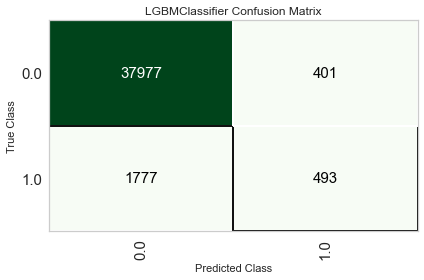

In [30]:
plot_model(tuned_model, plot = 'confusion_matrix')

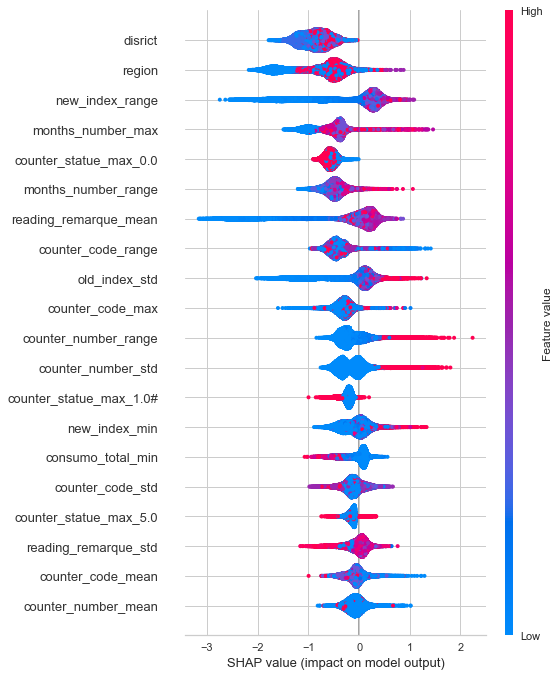

In [31]:
interpret_model(tuned_model)

In [37]:
create_app(tuned_model) #se crea una aplicación para probar el modelo en función de las variables

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [33]:
save_model(tuned_model,"tuned_lgbm2")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Pablo\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tarif_type_mean',
                                              'counter_number_mean',
                                              'counter_statue_mean',
                                              'counter_code_mean',
                                              'reading_remarque_mean',
                                              'counter_coefficient_mean',
                                              'old_index_mean', 'new_index_mean',
                                              'months_number_mean',
                                              'counter_type_m...
                                 colsample_bytree=1.0, feature_fraction=0.4,
                                 importance_type='split', learning_rate=0.2,
                                 max_depth=-1,